In [1]:
%load_ext autoreload
%autoreload 2

# Task 1
Apply Sequential Importance Sampling (SIS) for the synthetic time varying AR problem in the Kalman Filter Assignment. Show that sequential impor- tance sampling suffers from weight degeneracy. Implement a particle filter on the synthetic time varying AR problem by extending SIS to include a resampling step. Investigate the impact of resampling on the importance weights. Compare your results to Kalman filter solution and discuss your findings.

## State Space Model
$\theta (n) = \theta (n-1) + w(n)\\
y(n) = \theta^T x_n + v(n)$

In [2]:
from pf import sis

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from numpy.random import default_rng
seed = 42
rng = default_rng(seed=seed)

Text(0.5, 1.0, 'Time Varying Autoregressive Process')

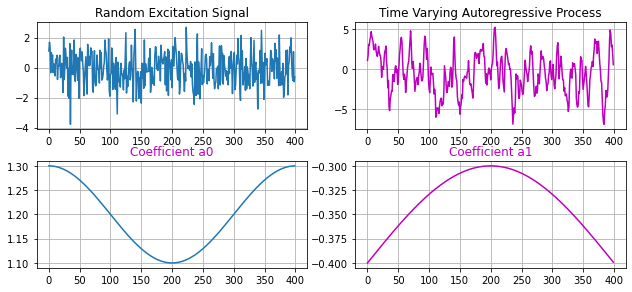

In [3]:
# Length of time series
#
N=400
# Gaussian random numbers as an excitation signal
#
ex = np.random.randn(N)
# Second order AR Process with coefficients slowly changing in time
#

a0 = np.array([1.2, -0.4])
A  = np.zeros((N,2))
omega, alpha = N/2, 0.1
for n in range(N):
    A[n,0] = a0[0] + (alpha * np.cos(2*np.pi*n/N))
    A[n,1] = a0[1] + (alpha * np.sin(np.pi*n/N))
S = ex.copy()
for n in range(2, N):
    x = np.array([S[n-1], S[n-2]])
    S[n] = np.dot(x, A[n,:]) + ex[n]

# a = np.array([1.2, -0.4])
# S = ex.copy()
# for n in range(2, N):
#     x = np.array([S[n-1], S[n-2]])
#     S[n] = np.dot(x, a) + ex[n]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,4))
plt.tight_layout()
ax[1,0].plot(range(N), A[:,0])
ax[1,0].grid(True)
ax[1,0].set_title("Coefficient a0", color='m')
ax[1,1].plot(range(N), A[:,1], color='m')
ax[1,1].grid(True)
ax[1,1].set_title("Coefficient a1", color='m')
ax[0,0].plot(range(N), ex)
ax[0,0].grid(True)
ax[0,0].set_title("Random Excitation Signal")
ax[0,1].plot(range(N), S, color='m')
ax[0,1].grid(True)
ax[0,1].set_title("Time Varying Autoregressive Process")
# plt.savefig("arChange.png")

## Sequential Importance Sampling (SIS) Algorithm

In [91]:
# theta0 = np.random.rand(2)
theta0 = np.array([1.2, -0.4])

beta = 0.01
Q = beta * np.eye(2) # process noise
R = np.var(ex) # observation noise

Ns = 3000

theta, weights, error = sis(S, theta0, Q, R, Ns)

100%|██████████| 398/398 [04:27<00:00,  1.49it/s]


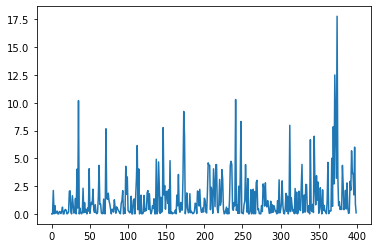

In [92]:
plt.plot(error)
# plt.ylim((0, 1000))

In [93]:
expected_theta = np.sum(weights[:, :, np.newaxis] * theta, axis=1)


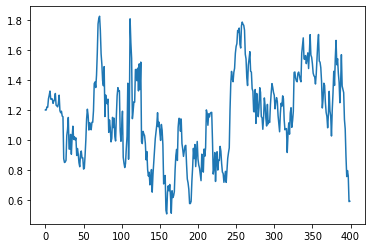

In [94]:
plt.plot(expected_theta[:, 0])

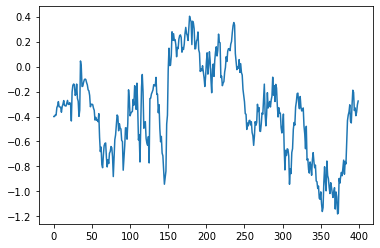

In [95]:
plt.plot(expected_theta[:, 1])